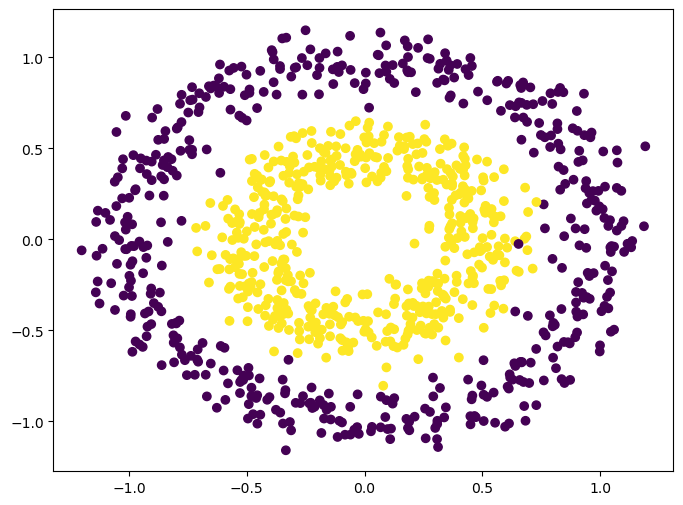

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        # print metrics every 10 epochs
        if (epoch+1) % 10 == 0:
            print("Before epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch+1, bce, acc*100))
    return bce_hist, acc_hist

Before epoch 10: BCE=0.6905, Accuracy=50.00%
Before epoch 20: BCE=0.6881, Accuracy=50.00%
Before epoch 30: BCE=0.6856, Accuracy=53.20%
Before epoch 40: BCE=0.6824, Accuracy=58.40%
Before epoch 50: BCE=0.6786, Accuracy=62.20%
Before epoch 60: BCE=0.6738, Accuracy=64.10%
Before epoch 70: BCE=0.6678, Accuracy=65.40%
Before epoch 80: BCE=0.6605, Accuracy=66.60%
Before epoch 90: BCE=0.6516, Accuracy=67.90%
Before epoch 100: BCE=0.6411, Accuracy=69.20%
Before epoch 110: BCE=0.6289, Accuracy=71.10%
Before epoch 120: BCE=0.6155, Accuracy=72.20%
Before epoch 130: BCE=0.6008, Accuracy=73.20%
Before epoch 140: BCE=0.5846, Accuracy=74.10%
Before epoch 150: BCE=0.5678, Accuracy=75.30%
Before epoch 160: BCE=0.5509, Accuracy=76.30%
Before epoch 170: BCE=0.5342, Accuracy=77.60%
Before epoch 180: BCE=0.5169, Accuracy=79.10%
Before epoch 190: BCE=0.4999, Accuracy=79.80%
Before epoch 200: BCE=0.4833, Accuracy=80.70%
Before epoch 210: BCE=0.4672, Accuracy=81.40%
Before epoch 220: BCE=0.4517, Accuracy=82.2

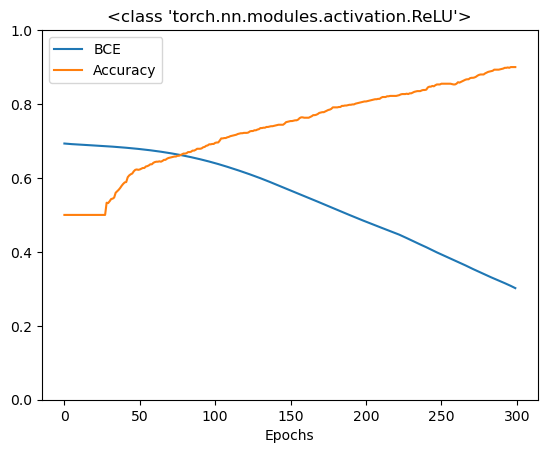

In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        # print metrics every 10 epochs
        if (epoch+1) % 10 == 0:
            print("Before epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch+1, bce, acc*100))
    return bce_hist, acc_hist

activation = nn.ReLU
model = Model(activation=activation)
bce_hist, acc_hist = train_loop(model, X, y)
plt.plot(bce_hist, label="BCE")
plt.plot(acc_hist, label="Accuracy")
plt.xlabel("Epochs")
plt.ylim(0, 1)
plt.title(str(activation))
plt.legend()
plt.show()

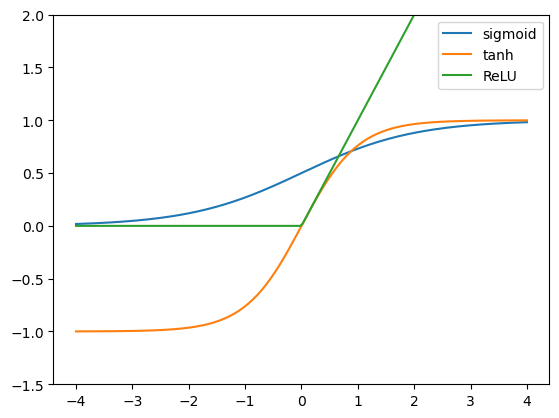

In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.linspace(-4, 4, 200)
relu = nn.ReLU()(x)
tanh = nn.Tanh()(x)
sigmoid = nn.Sigmoid()(x)

plt.plot(x, sigmoid, label="sigmoid")
plt.plot(x, tanh, label="tanh")
plt.plot(x, relu, label="ReLU")
plt.ylim(-1.5, 2)
plt.legend()
plt.show()

Epoch 9: BCE=0.6935, Accuracy=50.00%
Epoch 19: BCE=0.6916, Accuracy=50.00%
Epoch 29: BCE=0.6893, Accuracy=54.90%
Epoch 39: BCE=0.6866, Accuracy=76.00%
Epoch 49: BCE=0.6833, Accuracy=66.60%
Epoch 59: BCE=0.6788, Accuracy=64.90%
Epoch 69: BCE=0.6729, Accuracy=64.60%
Epoch 79: BCE=0.6653, Accuracy=65.30%
Epoch 89: BCE=0.6562, Accuracy=66.10%
Epoch 99: BCE=0.6453, Accuracy=67.60%
Epoch 109: BCE=0.6299, Accuracy=70.60%
Epoch 119: BCE=0.6123, Accuracy=74.30%
Epoch 129: BCE=0.5927, Accuracy=76.40%
Epoch 139: BCE=0.5710, Accuracy=79.10%
Epoch 149: BCE=0.5451, Accuracy=81.30%
Epoch 159: BCE=0.5082, Accuracy=77.90%
Epoch 169: BCE=0.4638, Accuracy=87.20%
Epoch 179: BCE=0.4225, Accuracy=91.00%
Epoch 189: BCE=0.3845, Accuracy=93.60%
Epoch 199: BCE=0.3486, Accuracy=95.50%
Epoch 209: BCE=0.3149, Accuracy=96.10%
Epoch 219: BCE=0.2835, Accuracy=96.40%
Epoch 229: BCE=0.2545, Accuracy=96.50%
Epoch 239: BCE=0.2283, Accuracy=96.30%
Epoch 249: BCE=0.2049, Accuracy=96.50%
Epoch 259: BCE=0.1845, Accuracy=96.9

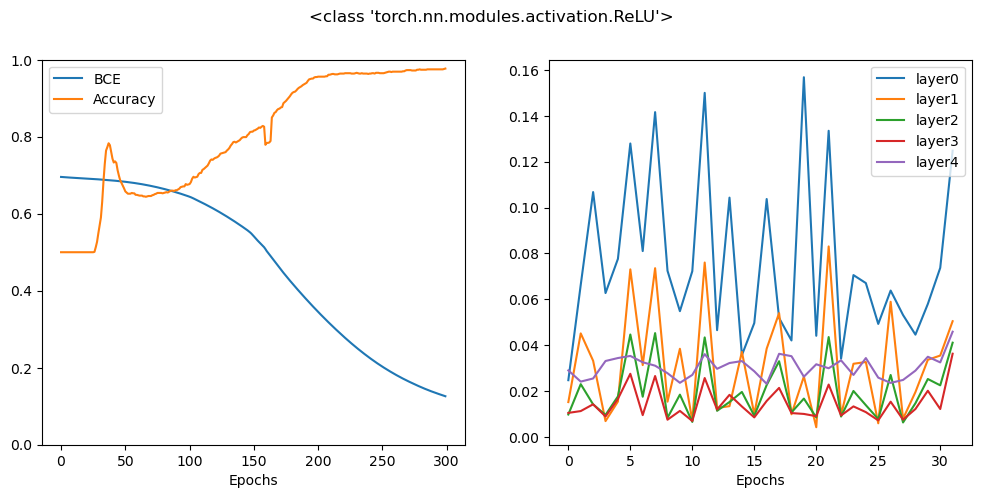

In [5]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

activation = nn.ReLU
model = Model(activation=activation)
bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(bce_hist, label="BCE")
ax[0].plot(acc_hist, label="Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylim(0, 1)
for n, grads in enumerate(grad_hist):
    ax[1].plot(grads, label="layer"+str(n))
ax[1].set_xlabel("Epochs")
fig.suptitle(str(activation))
ax[0].legend()
ax[1].legend()
plt.show()

Epoch 9: BCE=0.7004, Accuracy=50.00%
Epoch 19: BCE=0.6968, Accuracy=50.00%
Epoch 29: BCE=0.6949, Accuracy=50.00%
Epoch 39: BCE=0.6940, Accuracy=50.00%
Epoch 49: BCE=0.6935, Accuracy=50.00%
Epoch 59: BCE=0.6933, Accuracy=50.00%
Epoch 69: BCE=0.6932, Accuracy=50.00%
Epoch 79: BCE=0.6932, Accuracy=50.00%
Epoch 89: BCE=0.6932, Accuracy=50.00%
Epoch 99: BCE=0.6932, Accuracy=50.00%
Epoch 109: BCE=0.6932, Accuracy=50.00%
Epoch 119: BCE=0.6932, Accuracy=50.00%
Epoch 129: BCE=0.6931, Accuracy=50.00%
Epoch 139: BCE=0.6931, Accuracy=50.00%
Epoch 149: BCE=0.6931, Accuracy=50.00%
Epoch 159: BCE=0.6931, Accuracy=50.00%
Epoch 169: BCE=0.6931, Accuracy=50.00%
Epoch 179: BCE=0.6931, Accuracy=50.00%
Epoch 189: BCE=0.6931, Accuracy=50.00%
Epoch 199: BCE=0.6931, Accuracy=50.00%
Epoch 209: BCE=0.6931, Accuracy=50.00%
Epoch 219: BCE=0.6931, Accuracy=50.00%
Epoch 229: BCE=0.6931, Accuracy=50.00%
Epoch 239: BCE=0.6931, Accuracy=50.00%
Epoch 249: BCE=0.6931, Accuracy=50.00%
Epoch 259: BCE=0.6931, Accuracy=50.0

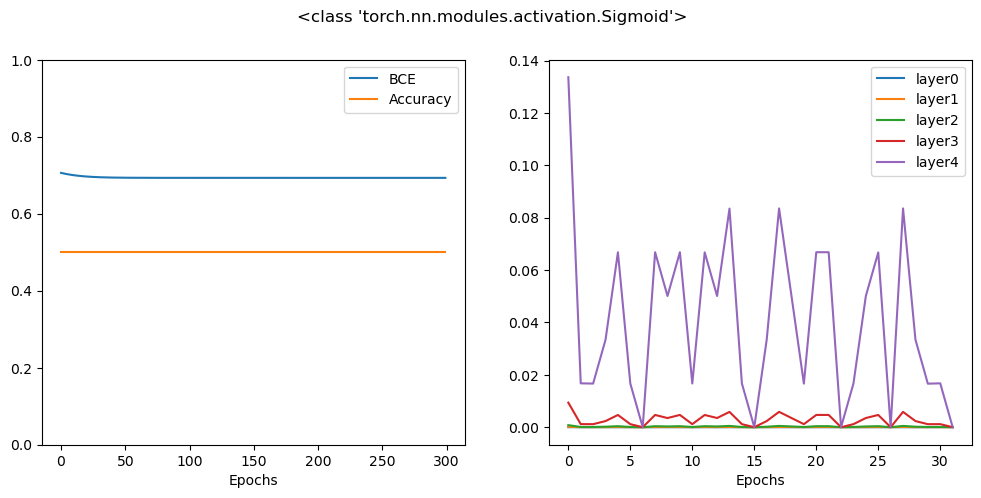

In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

activation = nn.Sigmoid
model = Model(activation=activation)
bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(bce_hist, label="BCE")
ax[0].plot(acc_hist, label="Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylim(0, 1)
for n, grads in enumerate(grad_hist):
    ax[1].plot(grads, label="layer"+str(n))
ax[1].set_xlabel("Epochs")
fig.suptitle(str(activation))
ax[0].legend()
ax[1].legend()
plt.show()

Epoch 9: BCE=0.7024, Accuracy=50.00%
Epoch 19: BCE=0.6968, Accuracy=50.00%
Epoch 29: BCE=0.6940, Accuracy=50.00%
Epoch 39: BCE=0.6925, Accuracy=50.00%
Epoch 49: BCE=0.6915, Accuracy=44.40%
Epoch 59: BCE=0.6905, Accuracy=46.00%
Epoch 69: BCE=0.6892, Accuracy=52.30%
Epoch 79: BCE=0.6874, Accuracy=54.90%
Epoch 89: BCE=0.6848, Accuracy=56.90%
Epoch 99: BCE=0.6809, Accuracy=60.30%
Epoch 109: BCE=0.6751, Accuracy=62.80%
Epoch 119: BCE=0.6670, Accuracy=66.80%
Epoch 129: BCE=0.6559, Accuracy=70.10%
Epoch 139: BCE=0.6414, Accuracy=75.10%
Epoch 149: BCE=0.6231, Accuracy=79.10%
Epoch 159: BCE=0.6006, Accuracy=83.40%
Epoch 169: BCE=0.5739, Accuracy=86.80%
Epoch 179: BCE=0.5432, Accuracy=88.90%
Epoch 189: BCE=0.5091, Accuracy=90.50%
Epoch 199: BCE=0.4722, Accuracy=92.50%
Epoch 209: BCE=0.4335, Accuracy=93.90%
Epoch 219: BCE=0.3940, Accuracy=95.80%
Epoch 229: BCE=0.3550, Accuracy=97.30%
Epoch 239: BCE=0.3175, Accuracy=97.90%
Epoch 249: BCE=0.2825, Accuracy=98.40%
Epoch 259: BCE=0.2507, Accuracy=98.6

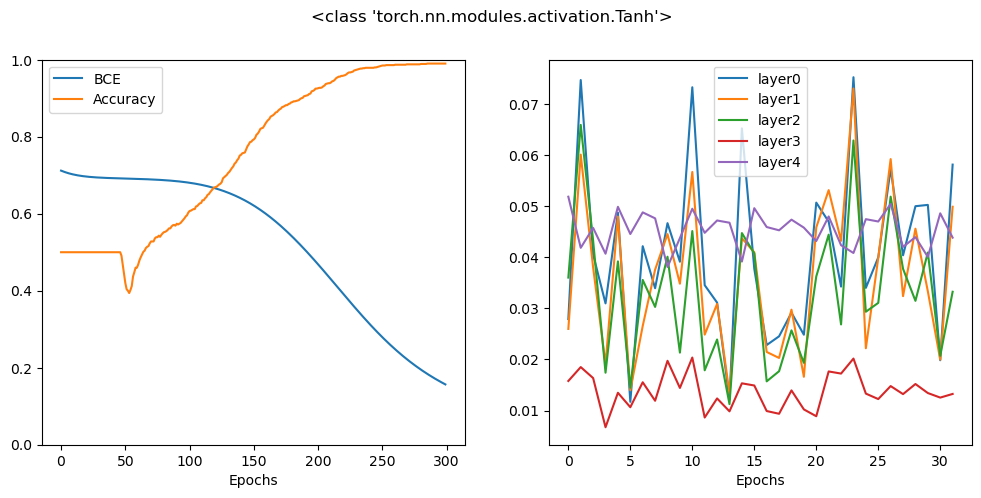

In [7]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

activation = nn.Tanh
model = Model(activation=activation)
bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(bce_hist, label="BCE")
ax[0].plot(acc_hist, label="Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylim(0, 1)
for n, grads in enumerate(grad_hist):
    ax[1].plot(grads, label="layer"+str(n))
ax[1].set_xlabel("Epochs")
fig.suptitle(str(activation))
ax[0].legend()
ax[1].legend()
plt.show()

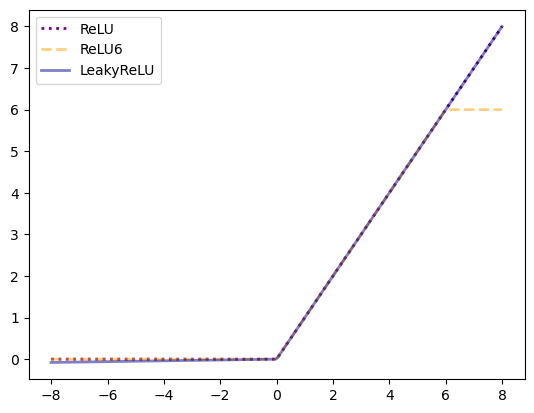

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-8,8,200)
relu = nn.ReLU()(x)
relu6 = nn.ReLU6()(x)
leaky = nn.LeakyReLU()(x)

plt.plot(x, relu, c="purple", lw=2, ls=":", label="ReLU")
plt.plot(x, relu6, c="orange", lw=2, ls="--", alpha=0.5, label="ReLU6")
plt.plot(x, leaky, c="darkblue", lw=2, alpha=0.5, label="LeakyReLU")
plt.legend()
plt.show()

Epoch 9: BCE=0.6935, Accuracy=50.00%
Epoch 19: BCE=0.6927, Accuracy=50.00%
Epoch 29: BCE=0.6920, Accuracy=50.00%
Epoch 39: BCE=0.6914, Accuracy=59.60%
Epoch 49: BCE=0.6907, Accuracy=62.00%
Epoch 59: BCE=0.6900, Accuracy=59.20%
Epoch 69: BCE=0.6892, Accuracy=58.30%
Epoch 79: BCE=0.6881, Accuracy=58.00%
Epoch 89: BCE=0.6853, Accuracy=60.30%
Epoch 99: BCE=0.6830, Accuracy=61.30%
Epoch 109: BCE=0.6802, Accuracy=61.40%
Epoch 119: BCE=0.6768, Accuracy=61.70%
Epoch 129: BCE=0.6726, Accuracy=62.40%
Epoch 139: BCE=0.6673, Accuracy=63.10%
Epoch 149: BCE=0.6609, Accuracy=63.90%
Epoch 159: BCE=0.6529, Accuracy=65.00%
Epoch 169: BCE=0.6433, Accuracy=66.90%
Epoch 179: BCE=0.6319, Accuracy=69.50%
Epoch 189: BCE=0.6183, Accuracy=70.90%
Epoch 199: BCE=0.6027, Accuracy=73.30%
Epoch 209: BCE=0.5852, Accuracy=74.80%
Epoch 219: BCE=0.5663, Accuracy=76.10%
Epoch 229: BCE=0.5465, Accuracy=77.20%
Epoch 239: BCE=0.5261, Accuracy=78.00%
Epoch 249: BCE=0.5051, Accuracy=78.70%
Epoch 259: BCE=0.4841, Accuracy=79.4

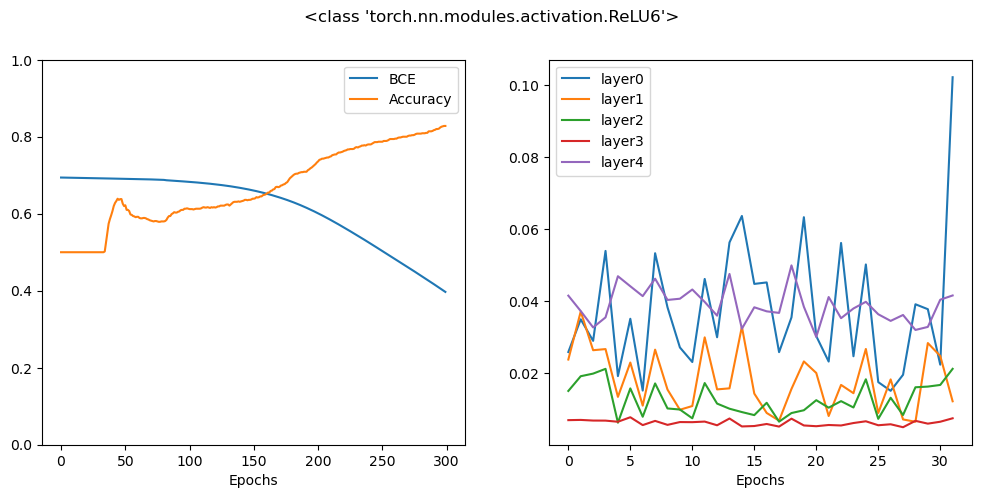

In [9]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

activation = nn.ReLU6
model = Model(activation=activation)
bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(bce_hist, label="BCE")
ax[0].plot(acc_hist, label="Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylim(0, 1)
for n, grads in enumerate(grad_hist):
    ax[1].plot(grads, label="layer"+str(n))
ax[1].set_xlabel("Epochs")
fig.suptitle(str(activation))
ax[0].legend()
ax[1].legend()
plt.show()

Epoch 9: BCE=0.6941, Accuracy=50.00%
Epoch 19: BCE=0.6906, Accuracy=50.00%
Epoch 29: BCE=0.6879, Accuracy=50.00%
Epoch 39: BCE=0.6851, Accuracy=50.00%
Epoch 49: BCE=0.6816, Accuracy=50.00%
Epoch 59: BCE=0.6763, Accuracy=50.00%
Epoch 69: BCE=0.6599, Accuracy=50.00%
Epoch 79: BCE=0.6426, Accuracy=50.00%
Epoch 89: BCE=0.6195, Accuracy=54.80%
Epoch 99: BCE=0.5915, Accuracy=63.30%
Epoch 109: BCE=0.5592, Accuracy=73.60%
Epoch 119: BCE=0.5232, Accuracy=79.30%
Epoch 129: BCE=0.4825, Accuracy=83.60%
Epoch 139: BCE=0.4439, Accuracy=88.10%
Epoch 149: BCE=0.4086, Accuracy=90.30%
Epoch 159: BCE=0.3794, Accuracy=92.10%
Epoch 169: BCE=0.3552, Accuracy=93.70%
Epoch 179: BCE=0.3347, Accuracy=94.90%
Epoch 189: BCE=0.3170, Accuracy=96.20%
Epoch 199: BCE=0.3015, Accuracy=97.00%
Epoch 209: BCE=0.2876, Accuracy=97.40%
Epoch 219: BCE=0.2751, Accuracy=98.00%
Epoch 229: BCE=0.2633, Accuracy=98.10%
Epoch 239: BCE=0.2479, Accuracy=98.30%
Epoch 249: BCE=0.2371, Accuracy=98.40%
Epoch 259: BCE=0.2283, Accuracy=98.4

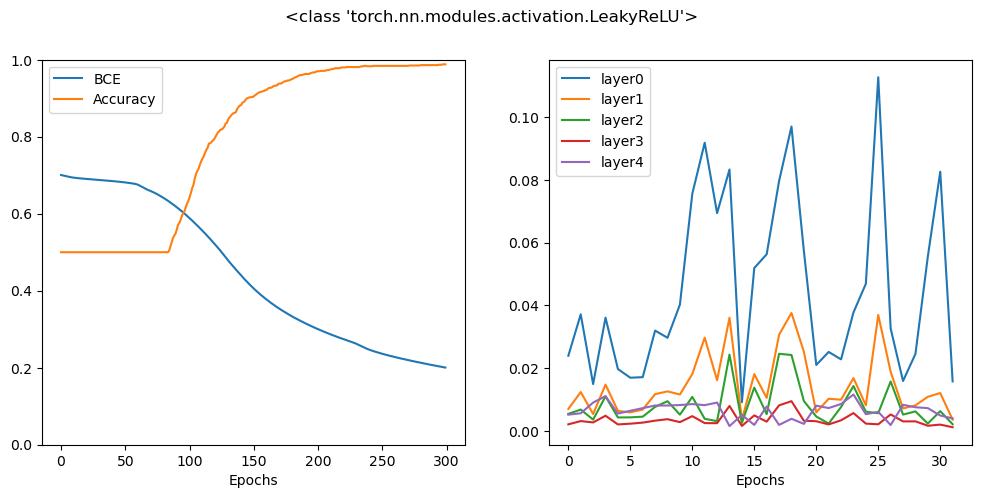

In [10]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

activation = nn.LeakyReLU
model = Model(activation=activation)
bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(bce_hist, label="BCE")
ax[0].plot(acc_hist, label="Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylim(0, 1)
for n, grads in enumerate(grad_hist):
    ax[1].plot(grads, label="layer"+str(n))
ax[1].set_xlabel("Epochs")
fig.suptitle(str(activation))
ax[0].legend()
ax[1].legend()
plt.show()

Epoch 9: BCE=0.7204, Accuracy=50.00%
Epoch 19: BCE=0.7107, Accuracy=50.00%
Epoch 29: BCE=0.7043, Accuracy=50.00%
Epoch 39: BCE=0.7001, Accuracy=50.00%
Epoch 49: BCE=0.6974, Accuracy=50.00%
Epoch 59: BCE=0.6957, Accuracy=50.00%
Epoch 69: BCE=0.6946, Accuracy=50.00%
Epoch 79: BCE=0.6940, Accuracy=50.00%
Epoch 89: BCE=0.6937, Accuracy=50.00%
Epoch 99: BCE=0.6935, Accuracy=50.00%
Epoch 109: BCE=0.6933, Accuracy=50.00%
Epoch 119: BCE=0.6933, Accuracy=50.00%
Epoch 129: BCE=0.6932, Accuracy=50.00%
Epoch 139: BCE=0.6932, Accuracy=50.00%
Epoch 149: BCE=0.6932, Accuracy=50.00%
Epoch 159: BCE=0.6932, Accuracy=50.00%
Epoch 169: BCE=0.6932, Accuracy=50.00%
Epoch 179: BCE=0.6932, Accuracy=50.00%
Epoch 189: BCE=0.6932, Accuracy=50.00%
Epoch 199: BCE=0.6932, Accuracy=50.00%
Epoch 209: BCE=0.6932, Accuracy=50.00%
Epoch 219: BCE=0.6932, Accuracy=50.00%
Epoch 229: BCE=0.6932, Accuracy=50.00%
Epoch 239: BCE=0.6932, Accuracy=50.00%
Epoch 249: BCE=0.6932, Accuracy=50.00%
Epoch 259: BCE=0.6932, Accuracy=50.0

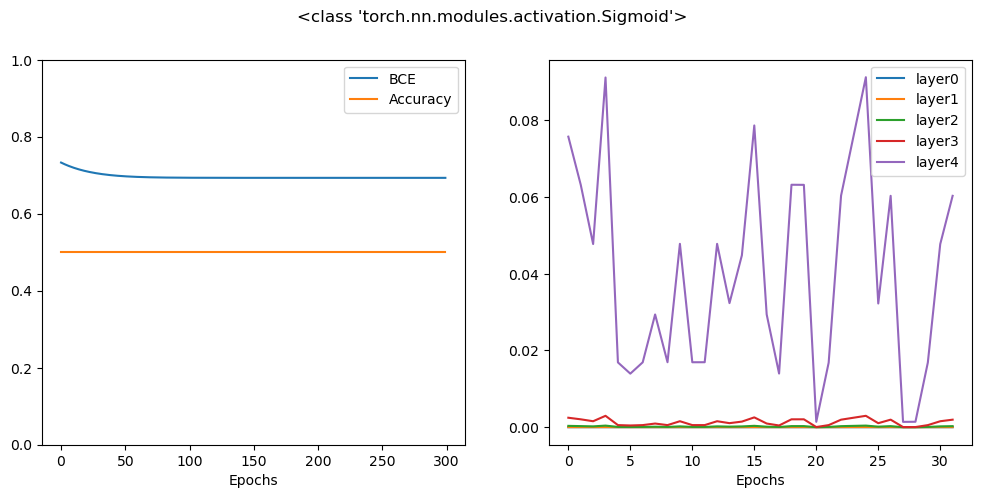

Epoch 9: BCE=0.6932, Accuracy=50.00%
Epoch 19: BCE=0.6919, Accuracy=50.00%
Epoch 29: BCE=0.6906, Accuracy=59.00%
Epoch 39: BCE=0.6892, Accuracy=62.90%
Epoch 49: BCE=0.6873, Accuracy=62.40%
Epoch 59: BCE=0.6848, Accuracy=61.00%
Epoch 69: BCE=0.6815, Accuracy=60.10%
Epoch 79: BCE=0.6774, Accuracy=59.90%
Epoch 89: BCE=0.6723, Accuracy=60.10%
Epoch 99: BCE=0.6660, Accuracy=60.80%
Epoch 109: BCE=0.6581, Accuracy=61.30%
Epoch 119: BCE=0.6481, Accuracy=62.90%
Epoch 129: BCE=0.6356, Accuracy=70.20%
Epoch 139: BCE=0.6210, Accuracy=76.20%
Epoch 149: BCE=0.6049, Accuracy=77.50%
Epoch 159: BCE=0.5885, Accuracy=77.70%
Epoch 169: BCE=0.5730, Accuracy=77.30%
Epoch 179: BCE=0.5591, Accuracy=77.00%
Epoch 189: BCE=0.5474, Accuracy=77.30%
Epoch 199: BCE=0.5378, Accuracy=77.10%
Epoch 209: BCE=0.5302, Accuracy=76.80%
Epoch 219: BCE=0.5241, Accuracy=76.60%
Epoch 229: BCE=0.5193, Accuracy=76.60%
Epoch 239: BCE=0.5152, Accuracy=76.50%
Epoch 249: BCE=0.5116, Accuracy=76.50%
Epoch 259: BCE=0.5083, Accuracy=76.5

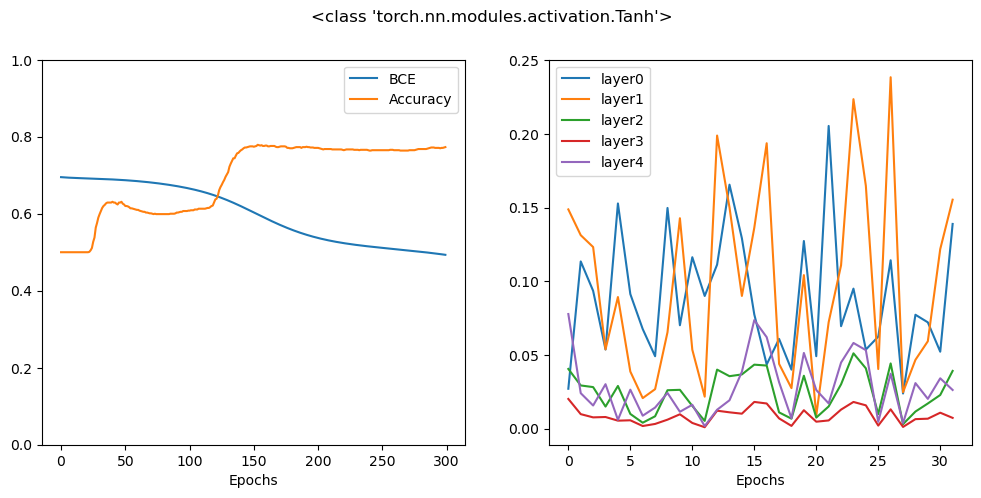

Epoch 9: BCE=0.7018, Accuracy=50.00%
Epoch 19: BCE=0.6962, Accuracy=50.00%
Epoch 29: BCE=0.6928, Accuracy=50.00%
Epoch 39: BCE=0.6906, Accuracy=50.00%
Epoch 49: BCE=0.6886, Accuracy=50.00%
Epoch 59: BCE=0.6866, Accuracy=50.00%
Epoch 69: BCE=0.6841, Accuracy=59.80%
Epoch 79: BCE=0.6810, Accuracy=62.10%
Epoch 89: BCE=0.6770, Accuracy=66.60%
Epoch 99: BCE=0.6719, Accuracy=73.00%
Epoch 109: BCE=0.6659, Accuracy=75.80%
Epoch 119: BCE=0.6585, Accuracy=77.70%
Epoch 129: BCE=0.6498, Accuracy=78.40%
Epoch 139: BCE=0.6403, Accuracy=79.00%
Epoch 149: BCE=0.6303, Accuracy=80.20%
Epoch 159: BCE=0.6196, Accuracy=80.50%
Epoch 169: BCE=0.6081, Accuracy=81.80%
Epoch 179: BCE=0.5957, Accuracy=83.10%
Epoch 189: BCE=0.5822, Accuracy=83.80%
Epoch 199: BCE=0.5677, Accuracy=85.20%
Epoch 209: BCE=0.5519, Accuracy=87.30%
Epoch 219: BCE=0.5330, Accuracy=88.80%
Epoch 229: BCE=0.5076, Accuracy=90.50%
Epoch 239: BCE=0.4821, Accuracy=92.10%
Epoch 249: BCE=0.4582, Accuracy=93.20%
Epoch 259: BCE=0.4358, Accuracy=94.7

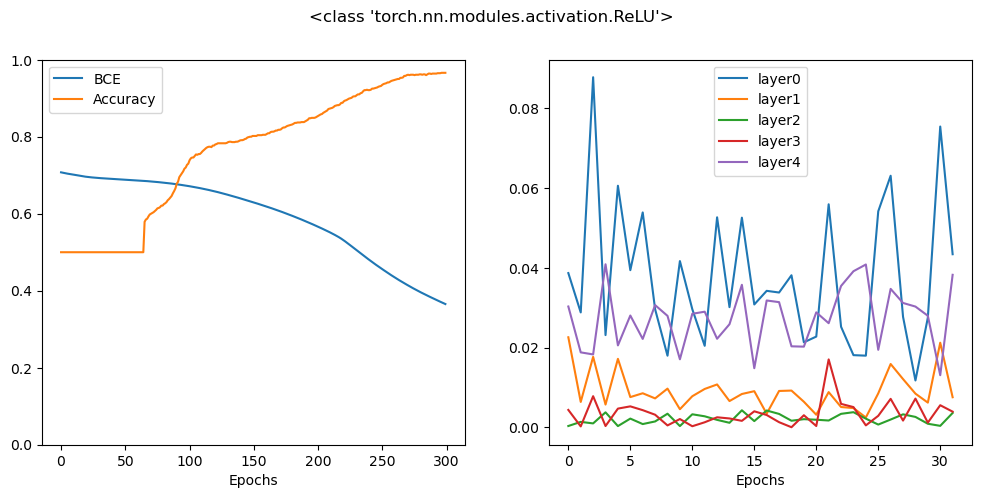

Epoch 9: BCE=0.6921, Accuracy=57.30%
Epoch 19: BCE=0.6915, Accuracy=62.80%
Epoch 29: BCE=0.6909, Accuracy=62.50%
Epoch 39: BCE=0.6902, Accuracy=58.90%
Epoch 49: BCE=0.6888, Accuracy=58.00%
Epoch 59: BCE=0.6868, Accuracy=59.10%
Epoch 69: BCE=0.6851, Accuracy=60.60%
Epoch 79: BCE=0.6825, Accuracy=63.10%
Epoch 89: BCE=0.6788, Accuracy=69.00%
Epoch 99: BCE=0.6742, Accuracy=75.30%
Epoch 109: BCE=0.6683, Accuracy=79.10%
Epoch 119: BCE=0.6608, Accuracy=81.60%
Epoch 129: BCE=0.6516, Accuracy=81.80%
Epoch 139: BCE=0.6410, Accuracy=81.60%
Epoch 149: BCE=0.6286, Accuracy=81.90%
Epoch 159: BCE=0.6148, Accuracy=83.20%
Epoch 169: BCE=0.5995, Accuracy=83.90%
Epoch 179: BCE=0.5818, Accuracy=85.40%
Epoch 189: BCE=0.5616, Accuracy=88.60%
Epoch 199: BCE=0.5405, Accuracy=92.10%
Epoch 209: BCE=0.5166, Accuracy=93.10%
Epoch 219: BCE=0.4921, Accuracy=93.90%
Epoch 229: BCE=0.4699, Accuracy=95.00%
Epoch 239: BCE=0.4489, Accuracy=96.20%
Epoch 249: BCE=0.4289, Accuracy=97.50%
Epoch 259: BCE=0.4098, Accuracy=97.6

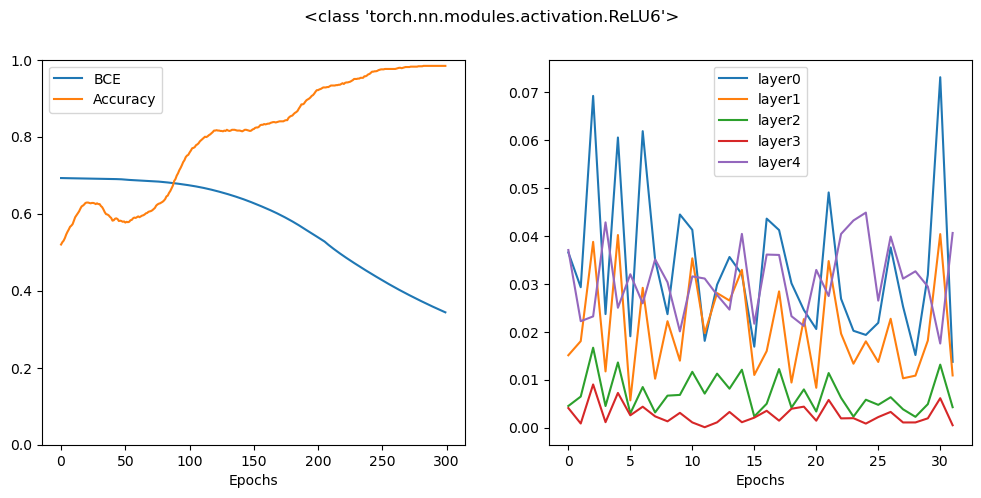

Epoch 9: BCE=0.6932, Accuracy=50.00%
Epoch 19: BCE=0.6931, Accuracy=50.00%
Epoch 29: BCE=0.6929, Accuracy=50.00%
Epoch 39: BCE=0.6927, Accuracy=47.20%
Epoch 49: BCE=0.6920, Accuracy=71.10%
Epoch 59: BCE=0.6905, Accuracy=72.30%
Epoch 69: BCE=0.6671, Accuracy=59.60%
Epoch 79: BCE=0.6540, Accuracy=61.30%
Epoch 89: BCE=0.6377, Accuracy=63.00%
Epoch 99: BCE=0.6188, Accuracy=69.20%
Epoch 109: BCE=0.5973, Accuracy=74.30%
Epoch 119: BCE=0.5729, Accuracy=79.50%
Epoch 129: BCE=0.5451, Accuracy=82.30%
Epoch 139: BCE=0.5102, Accuracy=85.80%
Epoch 149: BCE=0.4624, Accuracy=91.60%
Epoch 159: BCE=0.4176, Accuracy=94.40%
Epoch 169: BCE=0.3749, Accuracy=95.50%
Epoch 179: BCE=0.3340, Accuracy=96.50%
Epoch 189: BCE=0.2962, Accuracy=97.10%
Epoch 199: BCE=0.2606, Accuracy=98.10%
Epoch 209: BCE=0.2253, Accuracy=98.60%
Epoch 219: BCE=0.1951, Accuracy=98.80%
Epoch 229: BCE=0.1684, Accuracy=99.00%
Epoch 239: BCE=0.1450, Accuracy=99.00%
Epoch 249: BCE=0.1248, Accuracy=99.00%
Epoch 259: BCE=0.1073, Accuracy=98.9

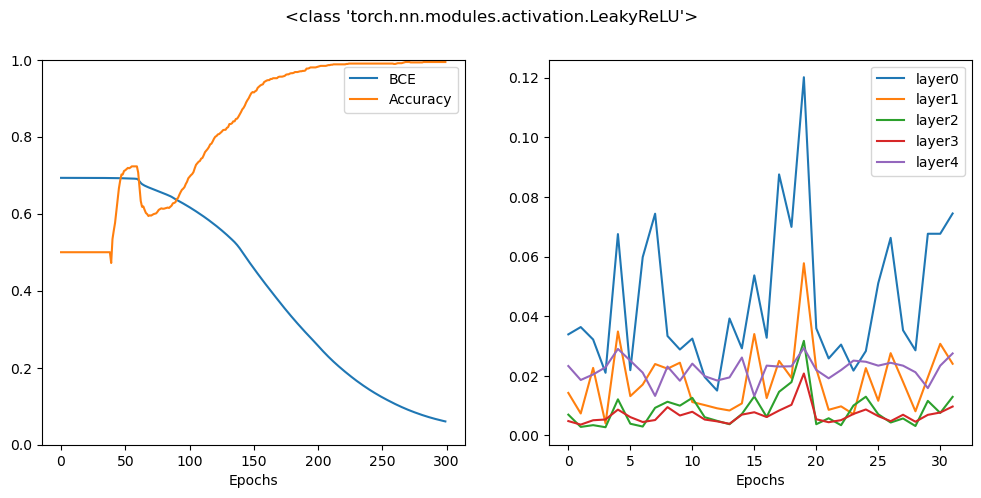

In [11]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

# Binary classification model
class Model(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.layer0 = nn.Linear(2,5)
        self.act0 = activation()
        self.layer1 = nn.Linear(5,5)
        self.act1 = activation()
        self.layer2 = nn.Linear(5,5)
        self.act2 = activation()
        self.layer3 = nn.Linear(5,5)
        self.act3 = activation()
        self.layer4 = nn.Linear(5,1)
        self.act4 = nn.Sigmoid()

    def forward(self, x):
        x = self.act0(self.layer0(x))
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        return x

# train the model and produce history
def train_loop(model, X, y, n_epochs=300, batch_size=32):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    batch_start = torch.arange(0, len(X), batch_size)

    bce_hist = []
    acc_hist = []
    grad_hist = [[],[],[],[],[]]

    for epoch in range(n_epochs):
        # train model with optimizer
        model.train()
        layer_grad = [[],[],[],[],[]]
        for start in batch_start:
            X_batch = X[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # collect mean absolute value of gradients
            layers = [model.layer0, model.layer1, model.layer2, model.layer3,
                      model.layer4]
            for n,layer in enumerate(layers):
                mean_grad = float(layer.weight.grad.abs().mean())
                layer_grad[n].append(mean_grad)
        # evaluate BCE and accuracy at end of each epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(X)
            bce = float(loss_fn(y_pred, y))
            acc = float((y_pred.round() == y).float().mean())
        bce_hist.append(bce)
        acc_hist.append(acc)
        for n, grads in enumerate(layer_grad):
            grad_hist[n].append(sum(grads)/len(grads))
        # print metrics every 10 epochs
        if epoch % 10 == 9:
            print("Epoch %d: BCE=%.4f, Accuracy=%.2f%%" % (epoch, bce, acc*100))
    return bce_hist, acc_hist, layer_grad

# pick different activation functions and compare the result visually
for activation in [nn.Sigmoid, nn.Tanh, nn.ReLU, nn.ReLU6, nn.LeakyReLU]:
    model = Model(activation=activation)
    bce_hist, acc_hist, grad_hist = train_loop(model, X, y)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(bce_hist, label="BCE")
    ax[0].plot(acc_hist, label="Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylim(0, 1)
    for n, grads in enumerate(grad_hist):
        ax[1].plot(grads, label="layer"+str(n))
    ax[1].set_xlabel("Epochs")
    fig.suptitle(str(activation))
    ax[0].legend()
    ax[1].legend()
    plt.show()